## ***Natual  Language Processing***

#**Introduction**
1.   The goal: Implement Text Classifier Model for newpapers in Vietnamese.
2.  Text Classification is an example of supervised machine learning task since a labelled dataset containing text documents and their labels is used for train a classifier. There are 3 steps that we need to do as follows: 
  *   Preprocessing Data: Data preparation, Feature Engineering
  *   Model training
  *   Model evaluation




# Preprocessing Data


*Data preparation*

In [ ]:
!pip3 install vncorenlp

In [ ]:
!pip install gensim 

In [ ]:
# To perform word segmentation only
!wget 'https://github.com/vncorenlp/VnCoreNLP/archive/v1.1.1.zip' -O ./models.$$ && unzip -o ./models.$$ && rm -r ./models.$$.

In [ ]:
import numpy as np
import gensim
import os
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
from vncorenlp import VnCoreNLP 
VNCOREDIR='/content/VnCoreNLP-1.1.1/VnCoreNLP-1.1.1.jar'
ANNOTATOR=VnCoreNLP(VNCOREDIR,port=9000,annotators='wseg',quiet=False)

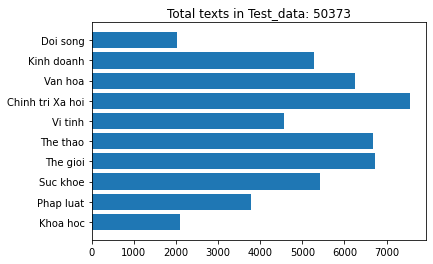

In [ ]:
file_path='/content/drive/MyDrive/Data_VietnamNews/Test_Full'
labels=[]
count_file=[]
for label in os.listdir(file_path):
  files=os.listdir(os.path.join(file_path,label))
  count_file.append(len(files))
  labels.append(label)
# statisfical test
y_pos=np.arange(len(labels))
plt.barh(y_pos,count_file,align='center')
plt.yticks(y_pos,labels=labels)
plt.title('Total texts in Test_data: %d' %(sum(count_file)))
plt.show()

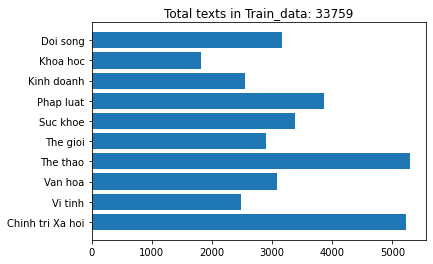

In [ ]:
file_path='/content/drive/MyDrive/Data_VietnamNews/Train_Full'
labels=[]
count_file=[]
for label in os.listdir(file_path):
  files=os.listdir(os.path.join(file_path,label))
  count_file.append(len(files))
  labels.append(label)
# Thống kê tệp test
y_pos=np.arange(len(labels))
plt.barh(y_pos,count_file,align='center')
plt.yticks(y_pos,labels=labels)
plt.title('Total texts in Train_data: %d' %(sum(count_file)))
plt.show()

In [ ]:
def normalization_text(text):
  text = gensim.utils.simple_preprocess(text)
  return ' '.join(text)

In [ ]:
def vietnamese_tokenize(text):
    words = ANNOTATOR.tokenize(text)
    list_word=[]
    for word in words:
        list_word += word
    return ' '.join(list_word)

In [ ]:
file_path='/content/drive/MyDrive/DataTextClassification_VietnamNews/vietnamese-stopwords-dash.txt'
dic_stopwords=[]
with open(file_path,'r',encoding='utf-8') as f:
  lines = f.readlines()
for word in lines:
  word=word[:-1]
  dic_stopwords.append(word)
dic_stopwords

def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in dic_stopwords:
            words.append(word)
    return ' '.join(words)

In [ ]:
def get_txt(file_path):
  with open(file_path,'r',encoding='utf-16') as f:
    lines = f.readlines()
    lines = ' '.join(lines)
    lines = normalization_text(lines)
    lines = vietnamese_tokenize(lines)
    lines = remove_stopwords(lines)
  return lines

In [ ]:
features=[]
labels=[]
file_path='/content/drive/MyDrive/Data_VietnamNews/Train_Full'
label = os.listdir(file_path)[0]
file=os.listdir(os.path.join(file_path,label))[0]
features.append(get_txt(os.path.join(file_path,label,file)))
features

['nhà_khoa_học nhiễm hố chôn gà dịch kiến phản_ánh người_dân nhiễm chôn gà chết tp hcm hố chôn dịch trào thoát khí nặng_mùi hôm trời nóng_bức vnexpress trao_đổi nhà_khoa_học quản_lý môi_trường giáo_sư tiến_sĩ tưởng thị hội_giảng_viên viện khoa_học công_nghệ môi_trường đh bách_khoa hà_nội động_vật chôn sâu đất phân_huỷ dạng hiếu_khí yếm_khí hợp_chất dạng lỏng thể khí_các dịch lỏng phát_sinh ngấm đất nhiễm xảy nghĩa_trang văn điển hà_nội khí thành phân_huỷ chất_hữu_cơ ch nh co thoát môi_trường mùi hôi độc_hại môi_trường sống giáo_sư nguyễn_công mẫn phó chủ_tịch viện địa kỹ_thuật liên_hiệp hội khoa_học_kỹ_thuật việt_nam chất_hữu_cơ phân_huỷ bãi chôn lấp rác chứa hợp_chất hữu_cơ canxi xương hố chôn gà chết dịch chứa vi_trùng bệnh biện_pháp thích_hợp thông_thường hố chôn lấp đường thoát rác ngấm đất phát_tán môi_trường xung_quanh khả_năng nguy_cơ nhiễm nước_ngầm tuỳ_thuộc tính_chất địa_tầng kiểm_tra xét_nghiệm kết_quả chính_xác đoàn thị trưởng phòng quản_lý môi_trường sở tài_nguyên môi_trườ

GetData


In [ ]:
def get_data(file_path):
  labels=[]
  features=[]
  for label in tqdm(os.listdir(file_path)):
    files=os.listdir(os.path.join(file_path,label))
    for file_name in files:
      features.append(get_txt(os.path.join(file_path,label,file_name)))
      labels.append(label)
  return features,labels

In [17]:
# Thử đọc tập Train
x,y=get_data('/content/drive/MyDrive/Data_VietnamNews/Train_Full')
print(x[0])
print(y[0])

100%|██████████| 10/10 [13:12<00:00, 79.25s/it]

nhà_khoa_học nhiễm hố chôn gà dịch kiến phản_ánh người_dân nhiễm chôn gà chết tp hcm hố chôn dịch trào thoát khí nặng_mùi hôm trời nóng_bức vnexpress trao_đổi nhà_khoa_học quản_lý môi_trường giáo_sư tiến_sĩ tưởng thị hội_giảng_viên viện khoa_học công_nghệ môi_trường đh bách_khoa hà_nội động_vật chôn sâu đất phân_huỷ dạng hiếu_khí yếm_khí hợp_chất dạng lỏng thể khí_các dịch lỏng phát_sinh ngấm đất nhiễm xảy nghĩa_trang văn điển hà_nội khí thành phân_huỷ chất_hữu_cơ ch nh co thoát môi_trường mùi hôi độc_hại môi_trường sống giáo_sư nguyễn_công mẫn phó chủ_tịch viện địa kỹ_thuật liên_hiệp hội khoa_học_kỹ_thuật việt_nam chất_hữu_cơ phân_huỷ bãi chôn lấp rác chứa hợp_chất hữu_cơ canxi xương hố chôn gà chết dịch chứa vi_trùng bệnh biện_pháp thích_hợp thông_thường hố chôn lấp đường thoát rác ngấm đất phát_tán môi_trường xung_quanh khả_năng nguy_cơ nhiễm nước_ngầm tuỳ_thuộc tính_chất địa_tầng kiểm_tra xét_nghiệm kết_quả chính_xác đoàn thị trưởng phòng quản_lý môi_trường sở tài_nguyên môi_trường

In [18]:
pickle.dump(x, open('/content/drive/MyDrive/Data_VietnamNews/X_data.pkl', 'wb'))
pickle.dump(y, open('/content/drive/MyDrive/Data_VietnamNews/Y_data.pkl', 'wb'))

In [19]:
# Tương tự với tập Test
x_test,y_test=get_data('/content/drive/MyDrive/Data_VietnamNews/Test_Full')
pickle.dump(x_test, open('/content/drive/MyDrive/Data_VietnamNews/X_test.pkl', 'wb'))
pickle.dump(y_test, open('/content/drive/MyDrive/Data_VietnamNews/Y_test.pkl', 'wb'))

100%|██████████| 10/10 [20:39<00:00, 124.00s/it]


# Features Engineering

In [22]:
X_data = pickle.load(open('/content/drive/MyDrive/Data_VietnamNews/X_data.pkl', 'rb'))
y_data = pickle.load(open('/content/drive/MyDrive/Data_VietnamNews/Y_data.pkl', 'rb'))

X_test = pickle.load(open('/content/drive/MyDrive/Data_VietnamNews/X_test.pkl', 'rb'))
y_test = pickle.load(open('/content/drive/MyDrive/Data_VietnamNews/Y_test.pkl', 'rb'))

In [24]:
print(X_test[10000])

protein phát_triển ung_thư da mỹ phát_hiện protein collagen vii đóng vai_trò di_căn bệnh ung_thư da chết bình_thường protein collagen vii giúp da mau lành khoẻ_mạnh da bệnh tế_bào ung_thư di_căn tổ_chức cơ_thể nhà_khoa_học đại_học stanford collagen vii chứng rối_loạn da gọi tắt rdeb căn_bệnh phát_triển thành bệnh ung_thư biểu mô tế_bào vẩy rdeb thực_chất đột_biến gene protein collagen vii hai hướng biến hai sót mảnh ta nghiên_cứu mẫu da trẻ rdeb dụng_cụ phòng_thí_nghiệm kích_hoạt trạm phân_tử chuyển_hoá tế_bào da thành ung_thư quan_sát mẫu da thành ung_thư cho_dù kích_thích đứa trẻ collagen vii mẫu bệnh_phẩm phát_triển thành ung_thư mảnh collagen vii sót kết_luận đứa trẻ tàn_tích protein collagen vii đột_biến ung_thư da mảnh tế_bào ung_thư da tấn_công tế_bào di_căn bộ_phận nghiên_cứu kháng_thể khống_chế mảnh collagen vii tác_quái da ung_thư thử_nghiệm chuột kết_quả tương_tự chứng_tỏ ngăn_chặn phát_triển căn_bệnh ung_thư da phát_triển ung_thư chuột nghiên_cứu sâu trưởng nghiên_cứu paul 